# Análisis Exploratorio de Datos - Netflix Titles
## Reporte de Entendimiento de Negocio

**Objetivo**: Realizar un análisis profundo del catálogo de Netflix para generar insights de negocio

**Dataset**: netflix_titles.csv (8,809 registros)

## 1. Importación de Librerías y Configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuración de tamaño de figuras
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

## 2. Carga de Datos

In [2]:
# Cargar dataset
df = pd.read_csv('netflix_titles.csv')

print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas:")
df.head()

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 8807 filas x 12 columnas

Primeras 5 filas:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Información general
print("\n" + "="*80)
print("INFORMACIÓN DE COLUMNAS")
print("="*80)
df.info()


INFORMACIÓN DE COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Estadísticas descriptivas
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
df.describe(include='all')


ESTADÍSTICAS DESCRIPTIVAS


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## 3. Análisis de Calidad de Datos

In [5]:
# Análisis de valores nulos
print("\n" + "="*80)
print("ANÁLISIS DE VALORES NULOS")
print("="*80)

missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
print(missing_data.to_string(index=False))


ANÁLISIS DE VALORES NULOS
   Columna  Valores Nulos  Porcentaje (%)
  director           2634           29.91
   country            831            9.44
      cast            825            9.37
date_added             10            0.11
    rating              4            0.05
  duration              3            0.03


<Figure size 1400x600 with 0 Axes>

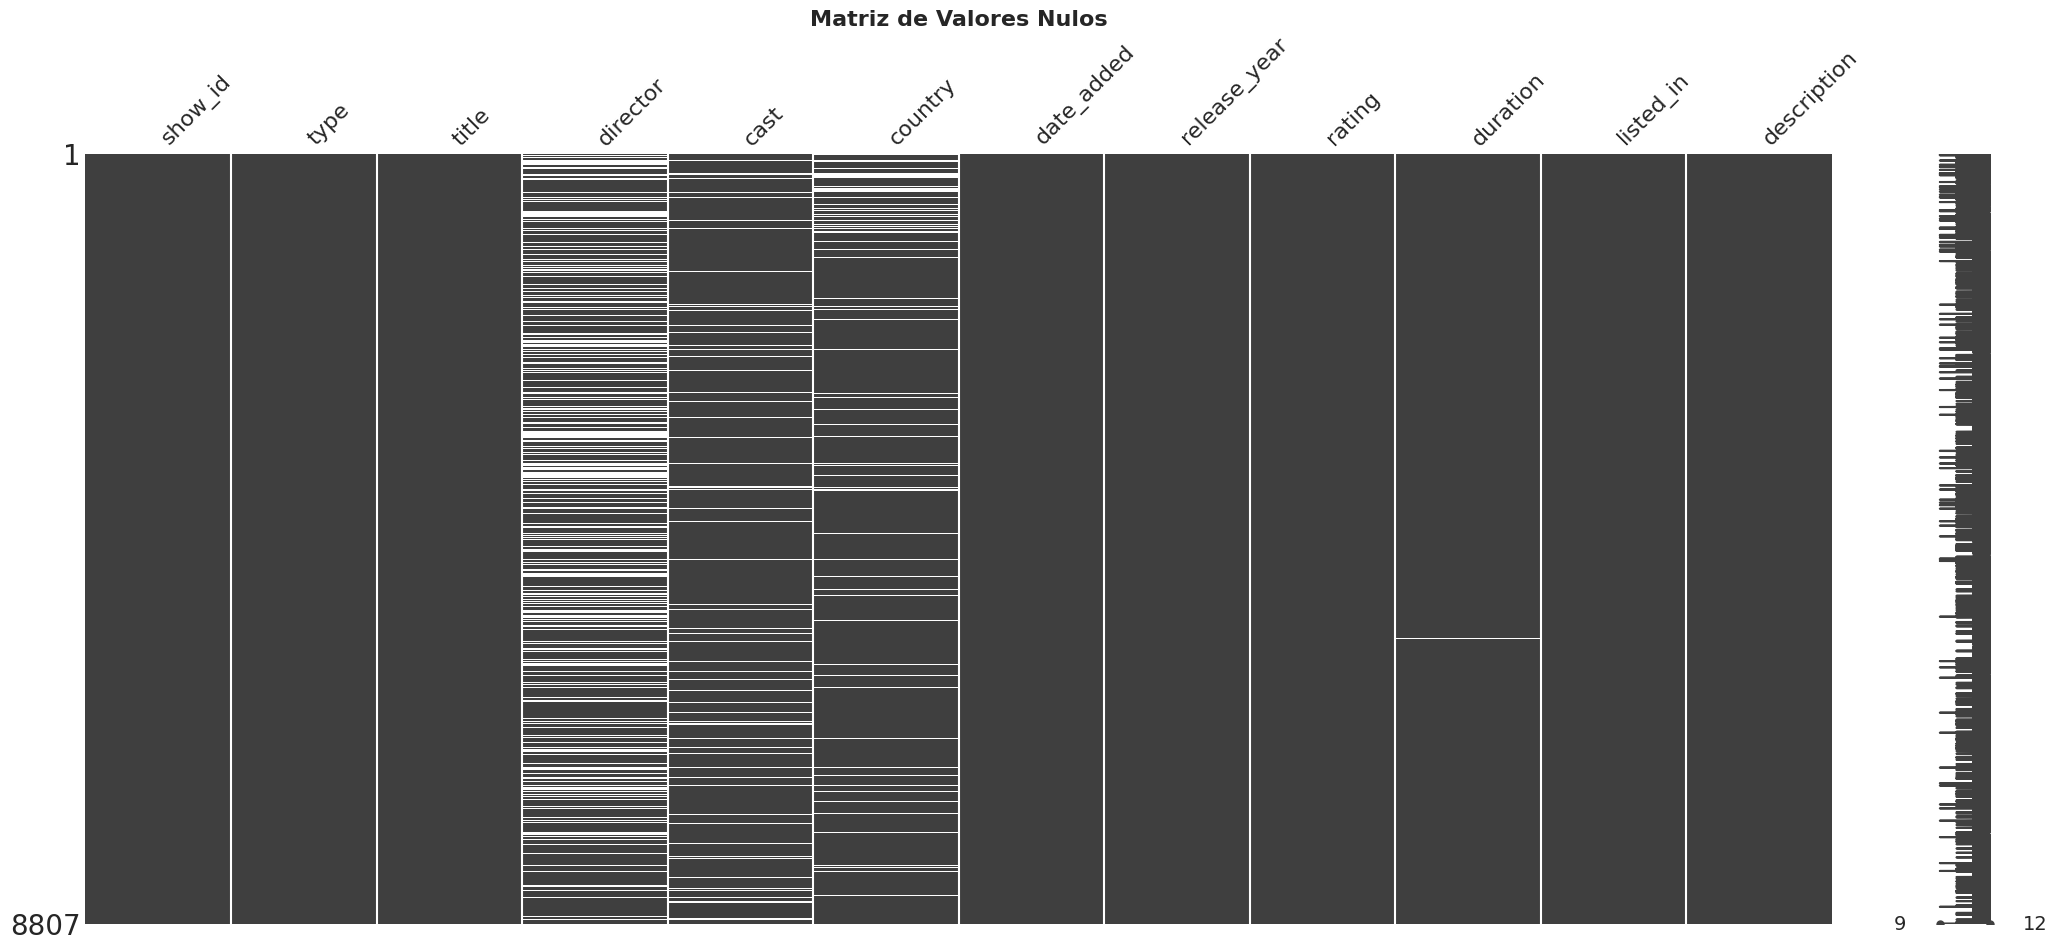

In [6]:
# Visualización de valores nulos
plt.figure(figsize=(14, 6))
msno.matrix(df)
plt.title('Matriz de Valores Nulos', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Análisis de duplicados
print("\n" + "="*80)
print("ANÁLISIS DE DUPLICADOS")
print("="*80)
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

# Duplicados por título
duplicados_titulo = df[df.duplicated(subset=['title'], keep=False)].sort_values('title')
print(f"\nTítulos duplicados: {len(duplicados_titulo)}")
if len(duplicados_titulo) > 0:
    print("\nEjemplos de títulos duplicados:")
    print(duplicados_titulo[['title', 'type', 'release_year', 'country']].head(10))


ANÁLISIS DE DUPLICADOS
Registros duplicados: 0

Títulos duplicados: 0


## 4. Análisis de Negocio - Distribución de Contenido


INSIGHT #1: DISTRIBUCIÓN DE CONTENIDO - MOVIES VS TV SHOWS

Total de contenido:
  Movie: 6,131 (69.62%)
  TV Show: 2,676 (30.38%)


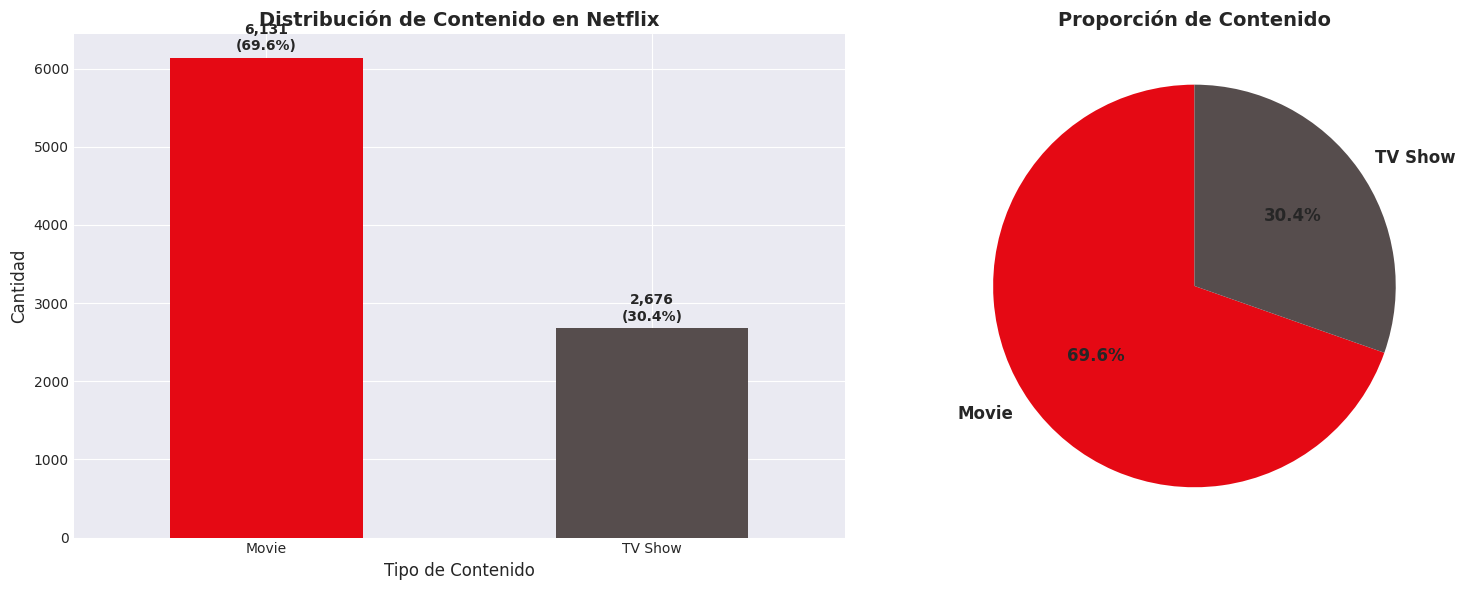


📊 INSIGHT CLAVE: Netflix tiene un catálogo dominado por películas (69.6%) sobre series (30.4%)


In [8]:
# Distribución Movies vs TV Shows
print("\n" + "="*80)
print("INSIGHT #1: DISTRIBUCIÓN DE CONTENIDO - MOVIES VS TV SHOWS")
print("="*80)

content_distribution = df['type'].value_counts()
content_pct = df['type'].value_counts(normalize=True) * 100

print(f"\nTotal de contenido:")
for tipo, count in content_distribution.items():
    print(f"  {tipo}: {count:,} ({content_pct[tipo]:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
ax1 = axes[0]
content_distribution.plot(kind='bar', ax=ax1, color=['#E50914', '#564d4d'])
ax1.set_title('Distribución de Contenido en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Contenido', fontsize=12)
ax1.set_ylabel('Cantidad', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, v in enumerate(content_distribution):
    ax1.text(i, v + 100, f'{v:,}\n({content_pct.iloc[i]:.1f}%)', ha='center', fontweight='bold')

# Gráfico de torta
ax2 = axes[1]
colors = ['#E50914', '#564d4d']
ax2.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Proporción de Contenido', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Netflix tiene un catálogo dominado por películas ({content_pct['Movie']:.1f}%) sobre series ({content_pct['TV Show']:.1f}%)")

## 5. Análisis Temporal - Evolución del Contenido

In [9]:
# Análisis de años de lanzamiento
print("\n" + "="*80)
print("INSIGHT #2: ANÁLISIS TEMPORAL - AÑOS DE LANZAMIENTO")
print("="*80)

print(f"\nRango de años de lanzamiento: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Año promedio de lanzamiento: {df['release_year'].mean():.0f}")
print(f"Mediana: {df['release_year'].median():.0f}")

# Contenido por década
df['decade'] = (df['release_year'] // 10) * 10
decade_dist = df.groupby(['decade', 'type']).size().unstack(fill_value=0)

print("\nContenido por década:")
print(decade_dist.tail(10))


INSIGHT #2: ANÁLISIS TEMPORAL - AÑOS DE LANZAMIENTO

Rango de años de lanzamiento: 1925 - 2021
Año promedio de lanzamiento: 2014
Mediana: 2017

Contenido por década:
type    Movie  TV Show
decade                
1920        0        1
1940       13        2
1950       11        0
1960       23        2
1970       66        4
1980      122        7
1990      241       33
2000      677      133
2010     4184     1743
2020      794      751


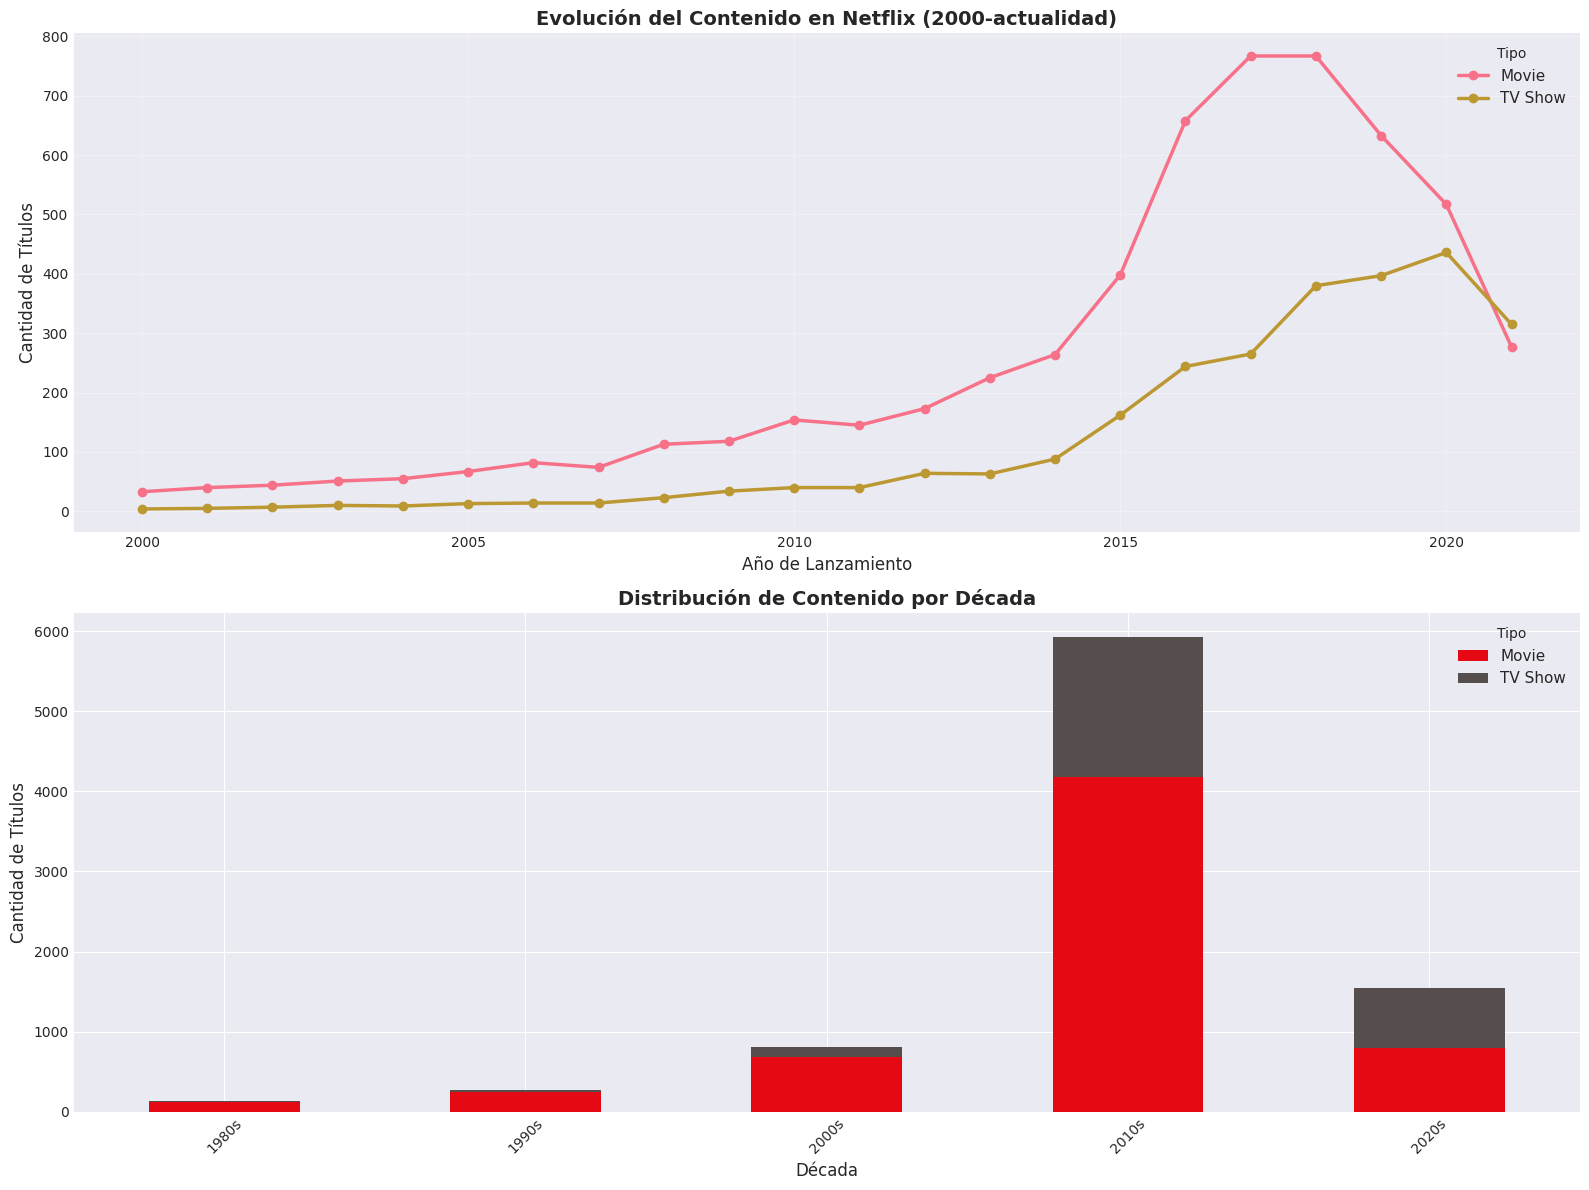


📊 INSIGHT CLAVE: Netflix tiene una fuerte presencia de contenido moderno, con un pico significativo en la última década


In [10]:
# Visualización temporal
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Evolución por año
ax1 = axes[0]
year_type = df[df['release_year'] >= 2000].groupby(['release_year', 'type']).size().unstack(fill_value=0)
year_type.plot(kind='line', ax=ax1, marker='o', linewidth=2.5, markersize=6)
ax1.set_title('Evolución del Contenido en Netflix (2000-actualidad)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Año de Lanzamiento', fontsize=12)
ax1.set_ylabel('Cantidad de Títulos', fontsize=12)
ax1.legend(title='Tipo', fontsize=11)
ax1.grid(True, alpha=0.3)

# Por década
ax2 = axes[1]
decade_dist[decade_dist.index >= 1980].plot(kind='bar', ax=ax2, stacked=True, color=['#E50914', '#564d4d'])
ax2.set_title('Distribución de Contenido por Década', fontsize=14, fontweight='bold')
ax2.set_xlabel('Década', fontsize=12)
ax2.set_ylabel('Cantidad de Títulos', fontsize=12)
ax2.set_xticklabels([f"{int(x)}s" for x in decade_dist[decade_dist.index >= 1980].index], rotation=45)
ax2.legend(title='Tipo', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Netflix tiene una fuerte presencia de contenido moderno, con un pico significativo en la última década")

## 6. Análisis de Fecha de Adición a Netflix

In [11]:
# Preparar datos de fecha de adición
print("\n" + "="*80)
print("INSIGHT #3: ANÁLISIS DE ADICIÓN DE CONTENIDO A NETFLIX")
print("="*80)

# Convertir a datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()

print(f"\nPrimera adición registrada: {df['date_added'].min()}")
print(f"Última adición registrada: {df['date_added'].max()}")

# Contenido añadido por año
added_by_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
print("\nContenido añadido por año:")
print(added_by_year.tail(10))


INSIGHT #3: ANÁLISIS DE ADICIÓN DE CONTENIDO A NETFLIX

Primera adición registrada: 2008-01-01 00:00:00
Última adición registrada: 2021-09-25 00:00:00

Contenido añadido por año:
type        Movie  TV Show
year_added                
2012.0          3        0
2013.0          6        4
2014.0         19        4
2015.0         56       17
2016.0        253      165
2017.0        839      325
2018.0       1237      388
2019.0       1424      575
2020.0       1284      594
2021.0        993      505


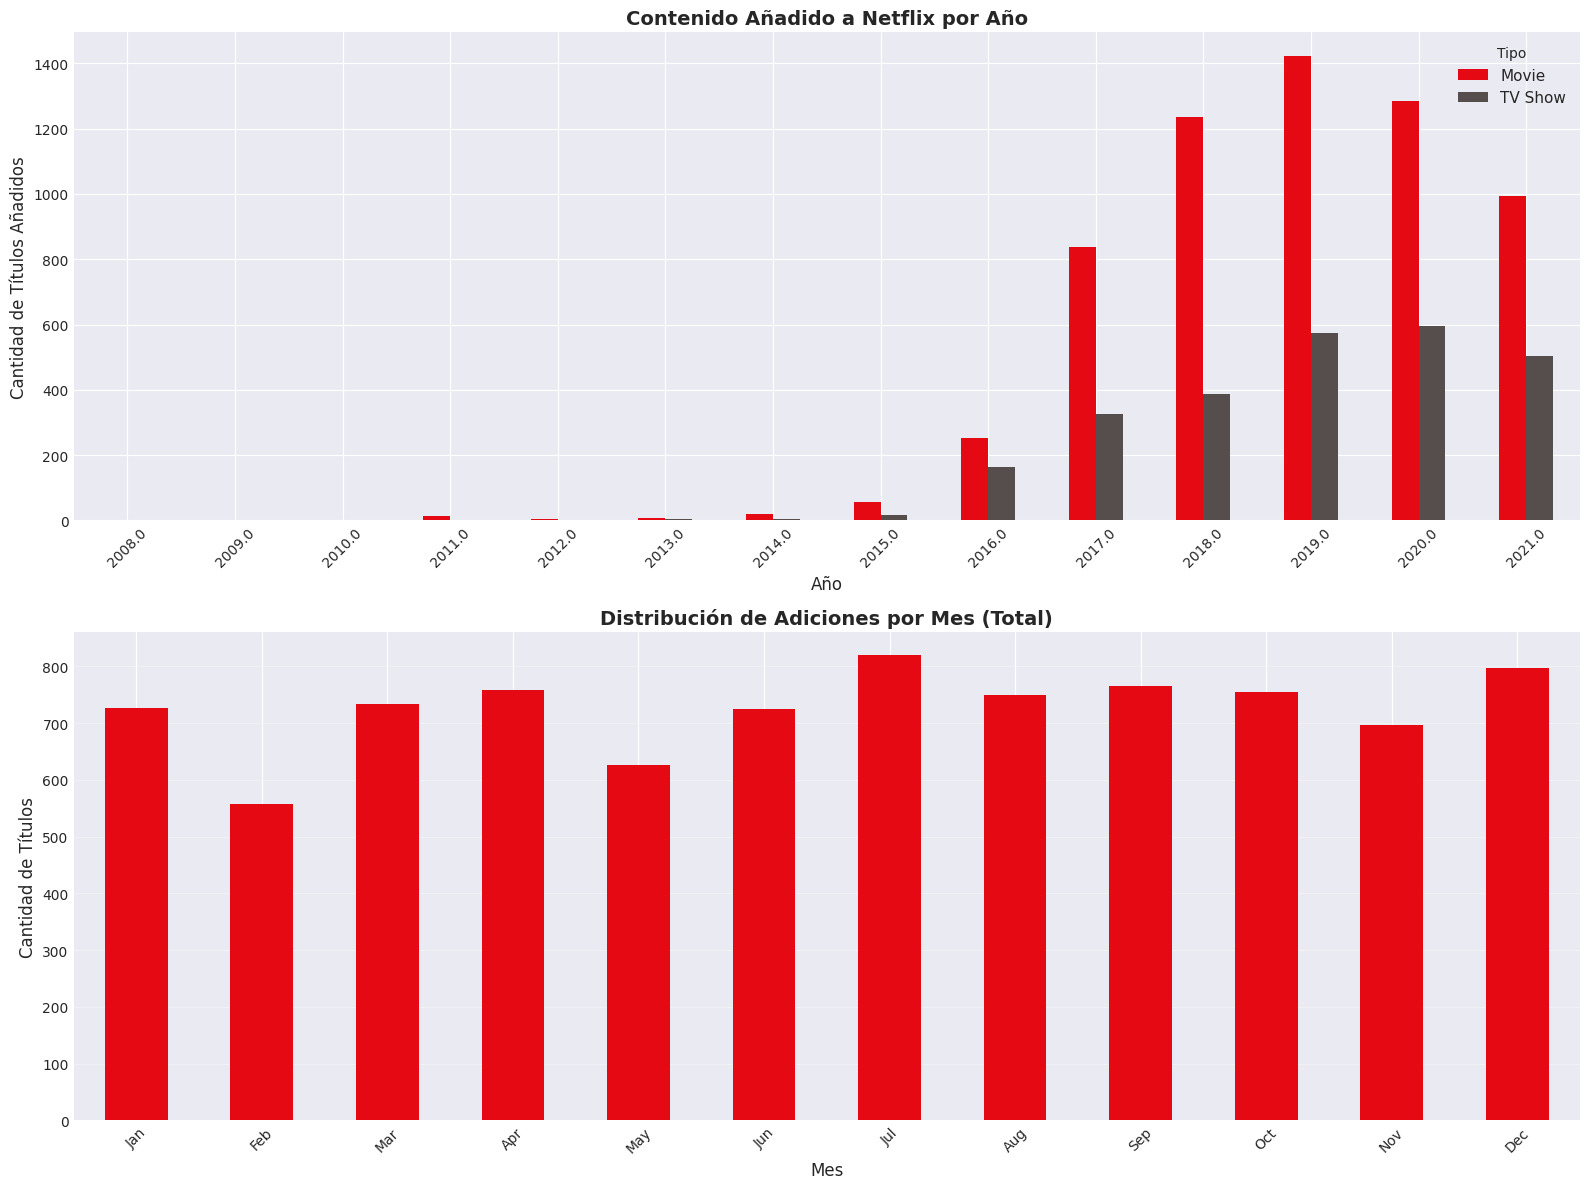


📊 INSIGHT CLAVE: Netflix ha incrementado significativamente la adición de contenido en los últimos años


In [12]:
# Visualización de adiciones
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Por año
ax1 = axes[0]
added_by_year.plot(kind='bar', ax=ax1, color=['#E50914', '#564d4d'])
ax1.set_title('Contenido Añadido a Netflix por Año', fontsize=14, fontweight='bold')
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Cantidad de Títulos Añadidos', fontsize=12)
ax1.legend(title='Tipo', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Por mes (promedio)
ax2 = axes[1]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_dist = df.groupby('month_name').size().reindex(month_order)
month_dist.plot(kind='bar', ax=ax2, color='#E50914')
ax2.set_title('Distribución de Adiciones por Mes (Total)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mes', fontsize=12)
ax2.set_ylabel('Cantidad de Títulos', fontsize=12)
ax2.set_xticklabels([m[:3] for m in month_order], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Netflix ha incrementado significativamente la adición de contenido en los últimos años")

## 7. Análisis Geográfico - Países Productores

In [13]:
# Análisis de países
print("\n" + "="*80)
print("INSIGHT #4: ANÁLISIS GEOGRÁFICO - PAÍSES PRODUCTORES")
print("="*80)

# Separar países (algunos títulos tienen múltiples países)
countries_list = df['country'].dropna().str.split(', ').explode()
top_countries = countries_list.value_counts().head(20)

print("\nTop 20 países productores:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f"{i:2d}. {country:30s}: {count:5,} títulos ({count/len(df)*100:5.2f}%)")

# Top países por tipo de contenido
df_countries = df.dropna(subset=['country']).copy()
df_countries['country_main'] = df_countries['country'].str.split(',').str[0].str.strip()
country_type = df_countries.groupby(['country_main', 'type']).size().unstack(fill_value=0)
top_countries_type = country_type.loc[country_type.sum(axis=1).nlargest(15).index]


INSIGHT #4: ANÁLISIS GEOGRÁFICO - PAÍSES PRODUCTORES

Top 20 países productores:
 1. United States                 : 3,689 títulos (41.89%)
 2. India                         : 1,046 títulos (11.88%)
 3. United Kingdom                :   804 títulos ( 9.13%)
 4. Canada                        :   445 títulos ( 5.05%)
 5. France                        :   393 títulos ( 4.46%)
 6. Japan                         :   318 títulos ( 3.61%)
 7. Spain                         :   232 títulos ( 2.63%)
 8. South Korea                   :   231 títulos ( 2.62%)
 9. Germany                       :   226 títulos ( 2.57%)
10. Mexico                        :   169 títulos ( 1.92%)
11. China                         :   162 títulos ( 1.84%)
12. Australia                     :   160 títulos ( 1.82%)
13. Egypt                         :   117 títulos ( 1.33%)
14. Turkey                        :   113 títulos ( 1.28%)
15. Hong Kong                     :   105 títulos ( 1.19%)
16. Nigeria                      

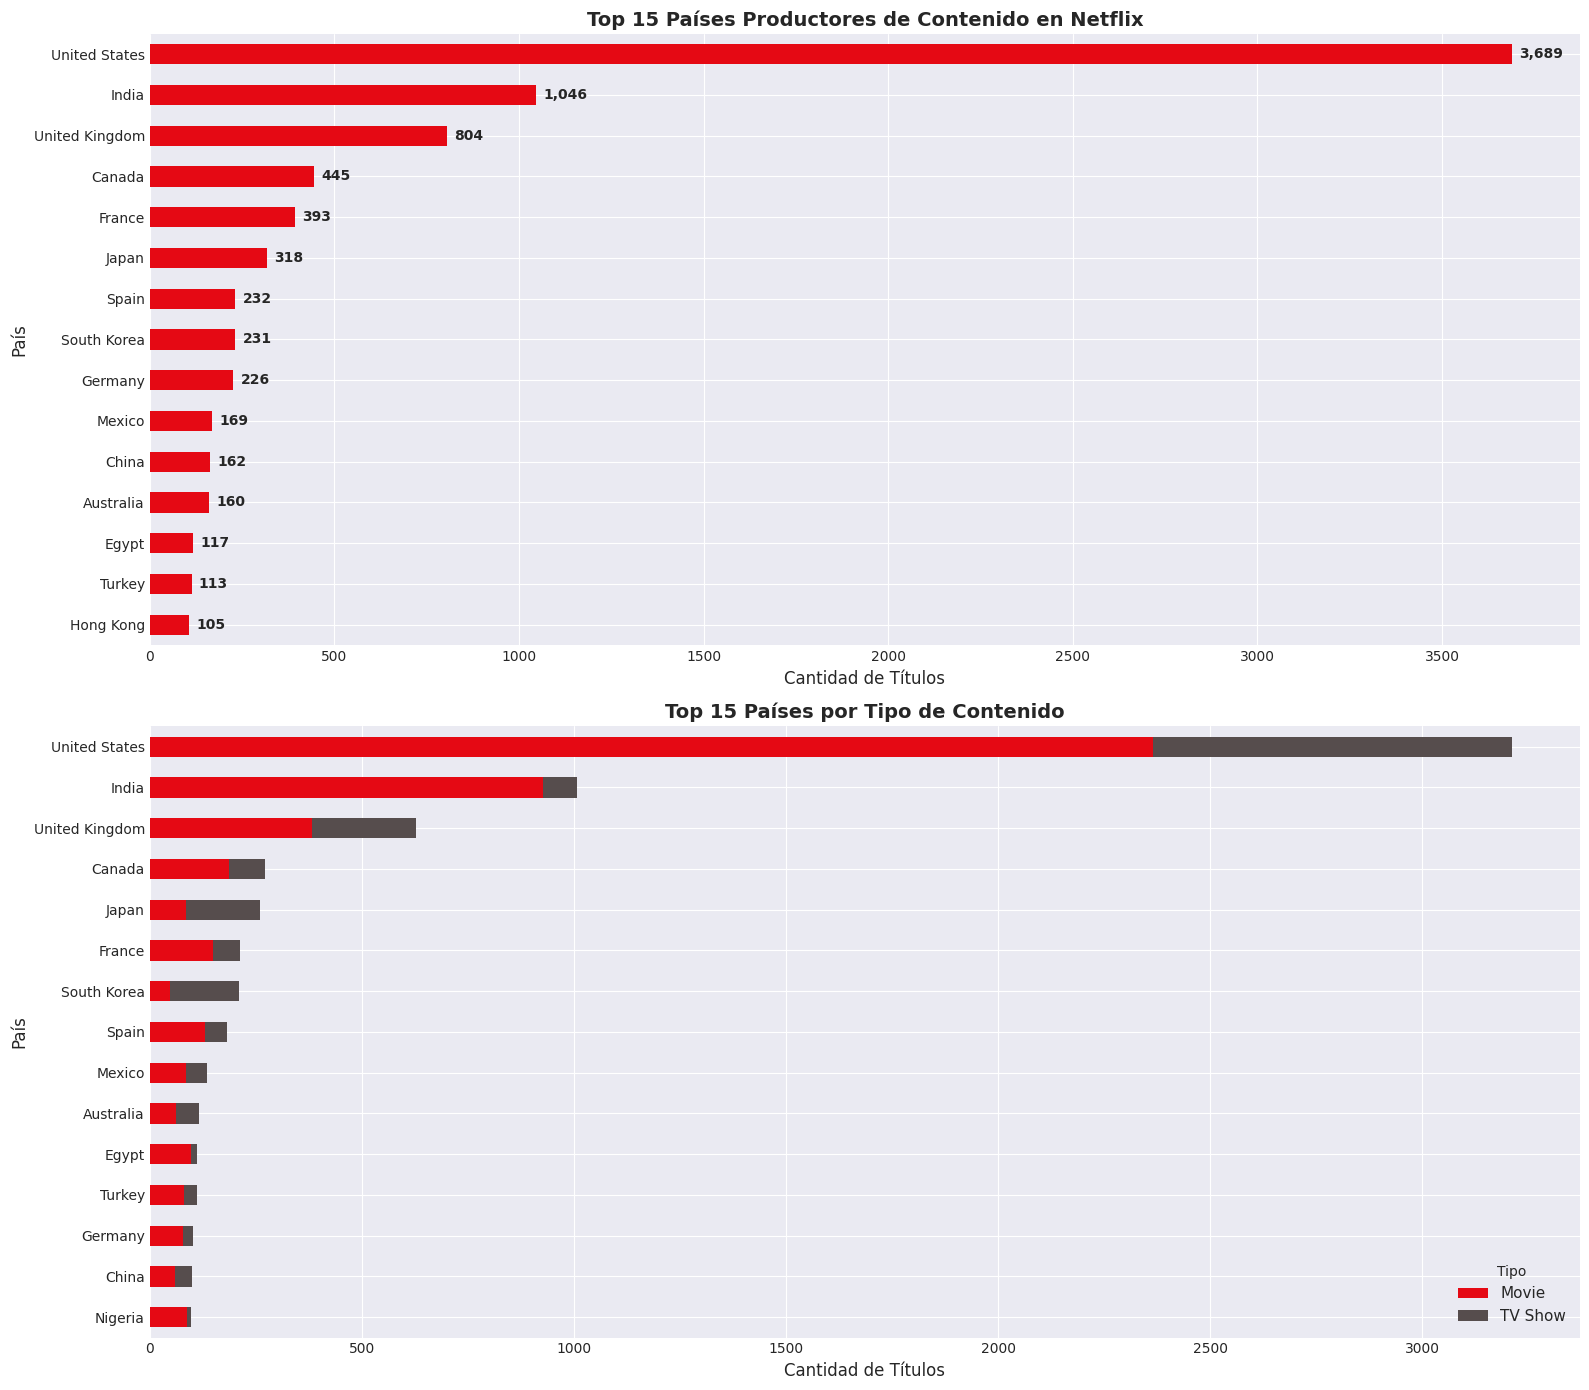


📊 INSIGHT CLAVE: Estados Unidos domina la producción de contenido, seguido por India y Reino Unido


In [14]:
# Visualización geográfica
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Top 15 países
ax1 = axes[0]
top_countries.head(15).plot(kind='barh', ax=ax1, color='#E50914')
ax1.set_title('Top 15 Países Productores de Contenido en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de Títulos', fontsize=12)
ax1.set_ylabel('País', fontsize=12)
ax1.invert_yaxis()
for i, v in enumerate(top_countries.head(15)):
    ax1.text(v + 20, i, f'{v:,}', va='center', fontweight='bold')

# Por tipo de contenido
ax2 = axes[1]
top_countries_type.plot(kind='barh', stacked=True, ax=ax2, color=['#E50914', '#564d4d'])
ax2.set_title('Top 15 Países por Tipo de Contenido', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Títulos', fontsize=12)
ax2.set_ylabel('País', fontsize=12)
ax2.invert_yaxis()
ax2.legend(title='Tipo', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Estados Unidos domina la producción de contenido, seguido por India y Reino Unido")

## 8. Análisis de Ratings (Clasificación por Edades)

In [15]:
# Análisis de ratings
print("\n" + "="*80)
print("INSIGHT #5: ANÁLISIS DE RATINGS (CLASIFICACIÓN POR EDADES)")
print("="*80)

rating_dist = df['rating'].value_counts()
print("\nDistribución de ratings:")
for rating, count in rating_dist.items():
    print(f"  {rating:10s}: {count:5,} ({count/len(df)*100:5.2f}%)")

# Ratings por tipo
rating_type = df.groupby(['rating', 'type']).size().unstack(fill_value=0)
top_ratings = rating_type.sum(axis=1).nlargest(10).index
rating_type_top = rating_type.loc[top_ratings]


INSIGHT #5: ANÁLISIS DE RATINGS (CLASIFICACIÓN POR EDADES)

Distribución de ratings:
  TV-MA     : 3,207 (36.41%)
  TV-14     : 2,160 (24.53%)
  TV-PG     :   863 ( 9.80%)
  R         :   799 ( 9.07%)
  PG-13     :   490 ( 5.56%)
  TV-Y7     :   334 ( 3.79%)
  TV-Y      :   307 ( 3.49%)
  PG        :   287 ( 3.26%)
  TV-G      :   220 ( 2.50%)
  NR        :    80 ( 0.91%)
  G         :    41 ( 0.47%)
  TV-Y7-FV  :     6 ( 0.07%)
  NC-17     :     3 ( 0.03%)
  UR        :     3 ( 0.03%)
  74 min    :     1 ( 0.01%)
  84 min    :     1 ( 0.01%)
  66 min    :     1 ( 0.01%)


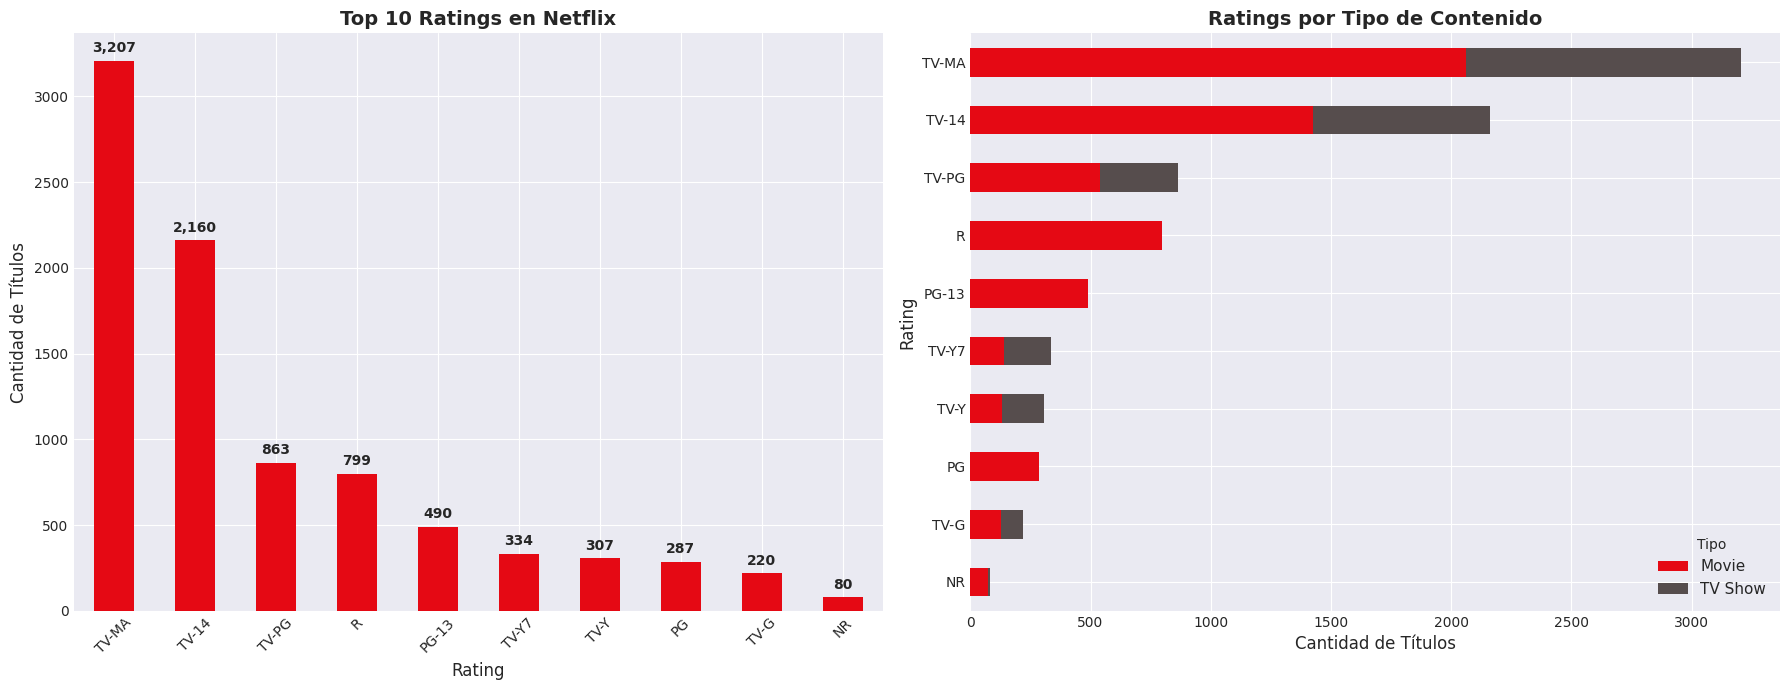


📊 INSIGHT CLAVE: El contenido para adultos (TV-MA, R) y adolescentes (TV-14, PG-13) domina el catálogo


In [16]:
# Visualización de ratings
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Distribución general
ax1 = axes[0]
rating_dist.head(10).plot(kind='bar', ax=ax1, color='#E50914')
ax1.set_title('Top 10 Ratings en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Cantidad de Títulos', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for i, v in enumerate(rating_dist.head(10)):
    ax1.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# Por tipo de contenido
ax2 = axes[1]
rating_type_top.plot(kind='barh', stacked=True, ax=ax2, color=['#E50914', '#564d4d'])
ax2.set_title('Ratings por Tipo de Contenido', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Títulos', fontsize=12)
ax2.set_ylabel('Rating', fontsize=12)
ax2.invert_yaxis()
ax2.legend(title='Tipo', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: El contenido para adultos (TV-MA, R) y adolescentes (TV-14, PG-13) domina el catálogo")

## 9. Análisis de Duración

In [17]:
# Análisis de duración
print("\n" + "="*80)
print("INSIGHT #6: ANÁLISIS DE DURACIÓN")
print("="*80)

# Separar películas y series
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extraer duración numérica
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

print("\nPELÍCULAS:")
print(f"  Duración promedio: {movies['duration_min'].mean():.1f} minutos")
print(f"  Duración mediana: {movies['duration_min'].median():.1f} minutos")
print(f"  Duración mínima: {movies['duration_min'].min():.0f} minutos")
print(f"  Duración máxima: {movies['duration_min'].max():.0f} minutos")

print("\nTV SHOWS:")
print(f"  Temporadas promedio: {tv_shows['seasons'].mean():.1f}")
print(f"  Temporadas mediana: {tv_shows['seasons'].median():.0f}")
print(f"  Mínimo de temporadas: {tv_shows['seasons'].min():.0f}")
print(f"  Máximo de temporadas: {tv_shows['seasons'].max():.0f}")

# Distribución de temporadas
seasons_dist = tv_shows['seasons'].value_counts().sort_index()
print("\nDistribución de temporadas:")
for season, count in seasons_dist.head(10).items():
    print(f"  {season:.0f} temporada(s): {count:4,} shows ({count/len(tv_shows)*100:5.2f}%)")


INSIGHT #6: ANÁLISIS DE DURACIÓN

PELÍCULAS:
  Duración promedio: 99.6 minutos
  Duración mediana: 98.0 minutos
  Duración mínima: 3 minutos
  Duración máxima: 312 minutos

TV SHOWS:
  Temporadas promedio: 1.8
  Temporadas mediana: 1
  Mínimo de temporadas: 1
  Máximo de temporadas: 17

Distribución de temporadas:
  1 temporada(s): 1,793 shows (67.00%)
  2 temporada(s):  425 shows (15.88%)
  3 temporada(s):  199 shows ( 7.44%)
  4 temporada(s):   95 shows ( 3.55%)
  5 temporada(s):   65 shows ( 2.43%)
  6 temporada(s):   33 shows ( 1.23%)
  7 temporada(s):   23 shows ( 0.86%)
  8 temporada(s):   17 shows ( 0.64%)
  9 temporada(s):    9 shows ( 0.34%)
  10 temporada(s):    7 shows ( 0.26%)


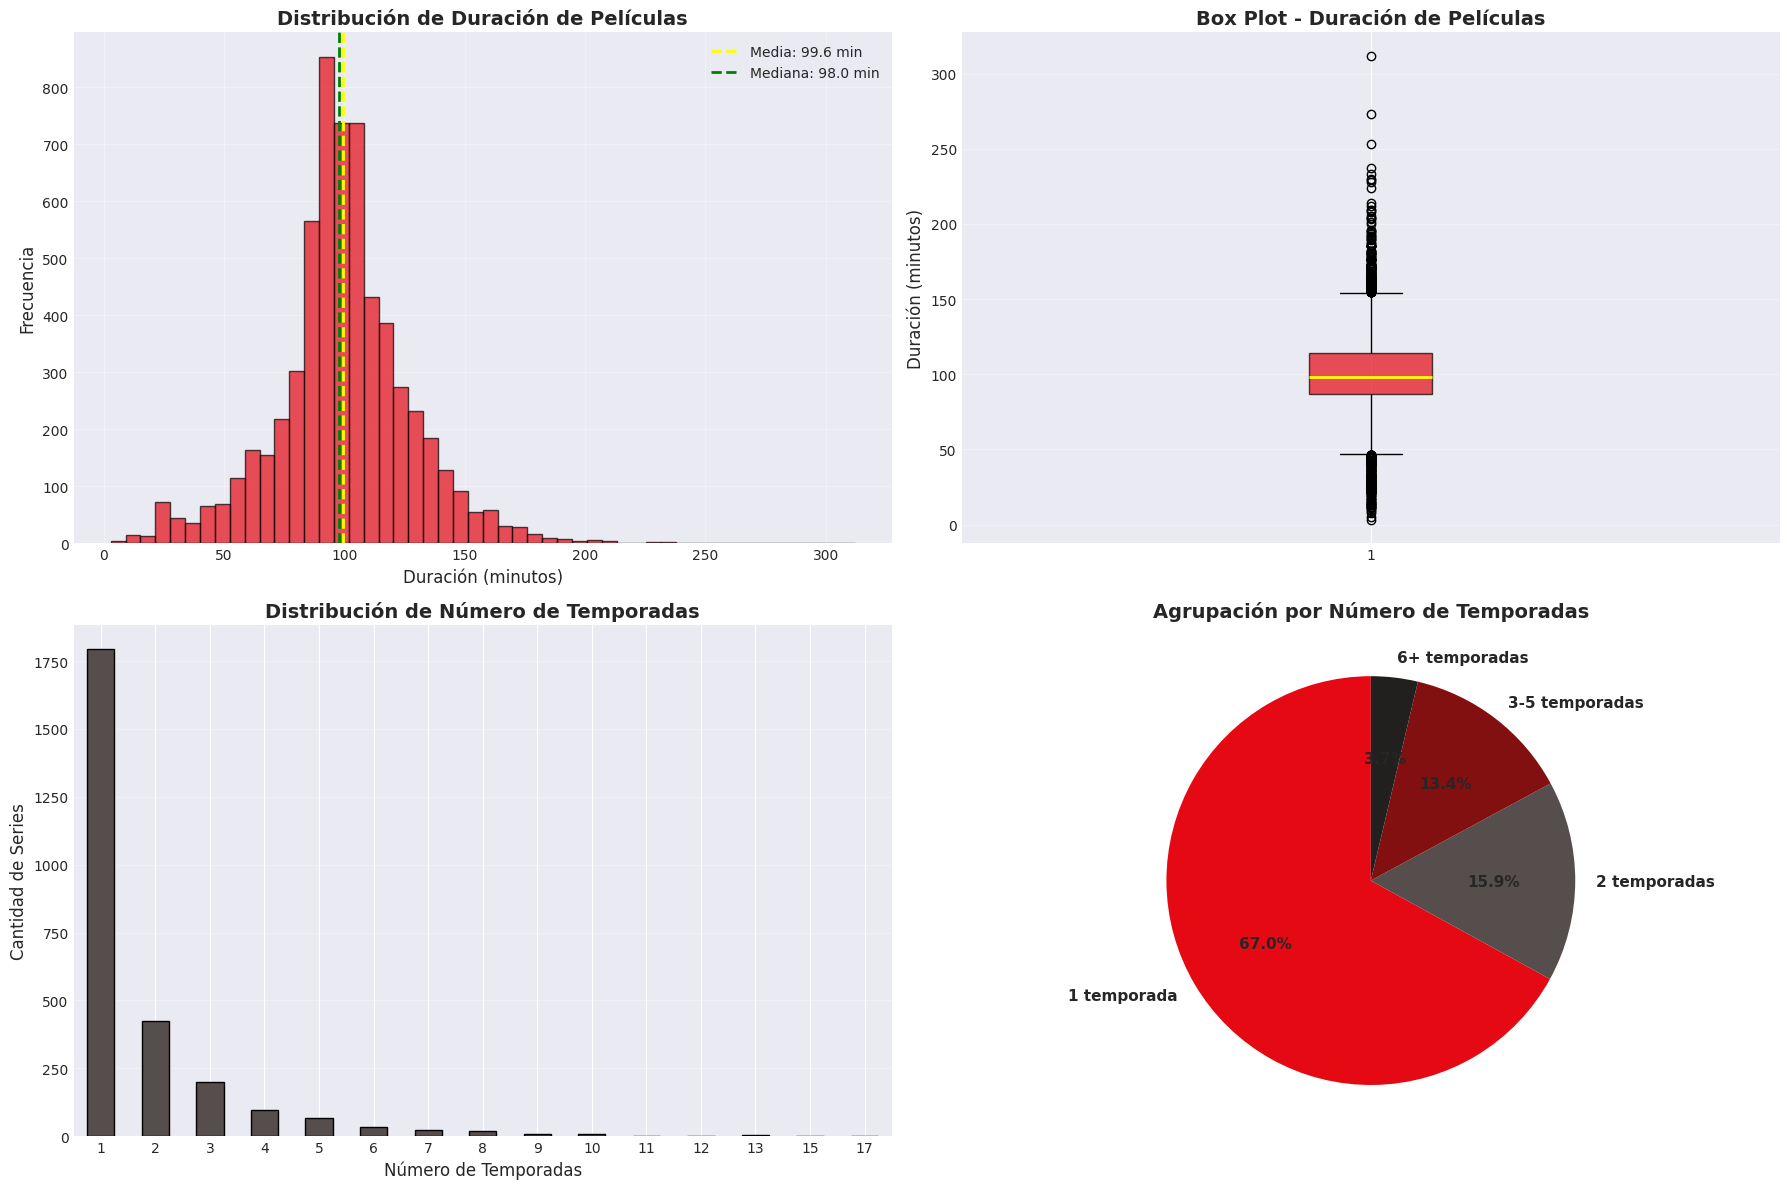


📊 INSIGHT CLAVE: Las películas tienen una duración promedio de ~100 min, y la mayoría de series tienen 1 temporada


In [18]:
# Visualización de duración
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Distribución de duración de películas
ax1 = axes[0, 0]
ax1.hist(movies['duration_min'].dropna(), bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax1.axvline(movies['duration_min'].mean(), color='yellow', linestyle='--', linewidth=2, label=f"Media: {movies['duration_min'].mean():.1f} min")
ax1.axvline(movies['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {movies['duration_min'].median():.1f} min")
ax1.set_title('Distribución de Duración de Películas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Duración (minutos)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot de duración de películas
ax2 = axes[0, 1]
ax2.boxplot(movies['duration_min'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='#E50914', alpha=0.7),
            medianprops=dict(color='yellow', linewidth=2))
ax2.set_title('Box Plot - Duración de Películas', fontsize=14, fontweight='bold')
ax2.set_ylabel('Duración (minutos)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Distribución de temporadas
ax3 = axes[1, 0]
seasons_dist.head(15).plot(kind='bar', ax=ax3, color='#564d4d', edgecolor='black')
ax3.set_title('Distribución de Número de Temporadas', fontsize=14, fontweight='bold')
ax3.set_xlabel('Número de Temporadas', fontsize=12)
ax3.set_ylabel('Cantidad de Series', fontsize=12)
ax3.set_xticklabels([f"{int(float(x.get_text()))}" for x in ax3.get_xticklabels()], rotation=0)
ax3.grid(True, alpha=0.3, axis='y')

# Pie chart de temporadas (1 vs múltiples)
ax4 = axes[1, 1]
season_groups = pd.cut(tv_shows['seasons'], bins=[0, 1, 2, 5, 100], 
                       labels=['1 temporada', '2 temporadas', '3-5 temporadas', '6+ temporadas'])
season_groups.value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%', startangle=90,
                                  colors=['#E50914', '#564d4d', '#831010', '#221f1f'],
                                  textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Agrupación por Número de Temporadas', fontsize=14, fontweight='bold')
ax4.set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Las películas tienen una duración promedio de ~{movies['duration_min'].mean():.0f} min, y la mayoría de series tienen 1 temporada")

## 10. Análisis de Géneros

In [19]:
# Análisis de géneros
print("\n" + "="*80)
print("INSIGHT #7: ANÁLISIS DE GÉNEROS")
print("="*80)

# Separar géneros (algunos títulos tienen múltiples géneros)
genres_list = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres_list.value_counts().head(20)

print("\nTop 20 géneros:")
for i, (genre, count) in enumerate(top_genres.items(), 1):
    print(f"{i:2d}. {genre:40s}: {count:5,} títulos ({count/len(df)*100:5.2f}%)")


INSIGHT #7: ANÁLISIS DE GÉNEROS

Top 20 géneros:
 1. International Movies                    : 2,752 títulos (31.25%)
 2. Dramas                                  : 2,427 títulos (27.56%)
 3. Comedies                                : 1,674 títulos (19.01%)
 4. International TV Shows                  : 1,351 títulos (15.34%)
 5. Documentaries                           :   869 títulos ( 9.87%)
 6. Action & Adventure                      :   859 títulos ( 9.75%)
 7. TV Dramas                               :   763 títulos ( 8.66%)
 8. Independent Movies                      :   756 títulos ( 8.58%)
 9. Children & Family Movies                :   641 títulos ( 7.28%)
10. Romantic Movies                         :   616 títulos ( 6.99%)
11. TV Comedies                             :   581 títulos ( 6.60%)
12. Thrillers                               :   577 títulos ( 6.55%)
13. Crime TV Shows                          :   470 títulos ( 5.34%)
14. Kids' TV                                :   451 t

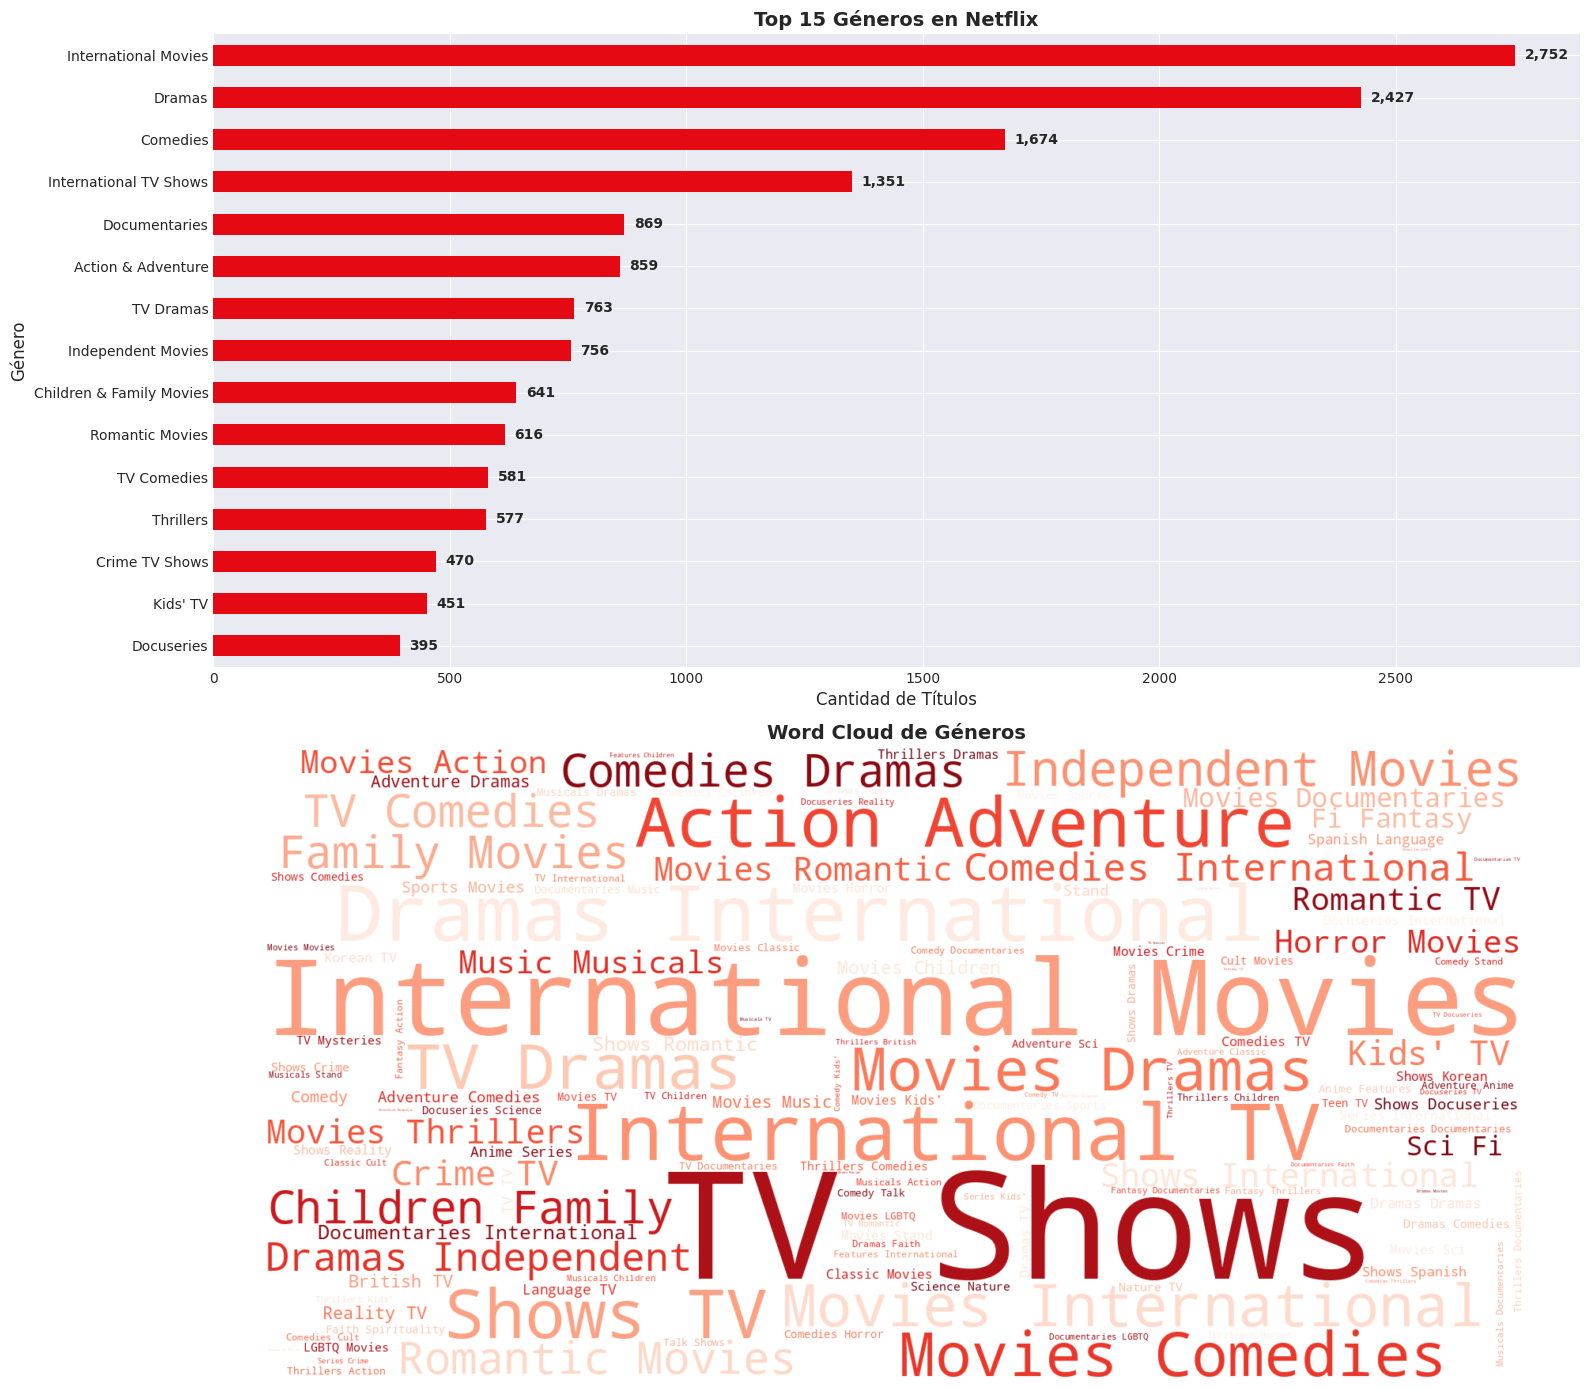


📊 INSIGHT CLAVE: Los géneros dominantes son dramas internacionales, comedias y documentales


In [20]:
# Visualización de géneros
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Top géneros
ax1 = axes[0]
top_genres.head(15).plot(kind='barh', ax=ax1, color='#E50914')
ax1.set_title('Top 15 Géneros en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de Títulos', fontsize=12)
ax1.set_ylabel('Género', fontsize=12)
ax1.invert_yaxis()
for i, v in enumerate(top_genres.head(15)):
    ax1.text(v + 20, i, f'{v:,}', va='center', fontweight='bold')

# WordCloud de géneros
ax2 = axes[1]
genre_text = ' '.join(genres_list.astype(str))
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='Reds', relative_scaling=0.5).generate(genre_text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title('Word Cloud de Géneros', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Los géneros dominantes son dramas internacionales, comedias y documentales")

## 11. Análisis de Directores y Actores

In [21]:
# Análisis de directores
print("\n" + "="*80)
print("INSIGHT #8: TOP DIRECTORES Y ACTORES")
print("="*80)

# Top directores
directors_list = df['director'].dropna().str.split(', ').explode()
top_directors = directors_list.value_counts().head(20)

print("\nTop 20 directores con más contenido:")
for i, (director, count) in enumerate(top_directors.items(), 1):
    print(f"{i:2d}. {director:40s}: {count:3,} títulos")

# Top actores
cast_list = df['cast'].dropna().str.split(', ').explode()
top_cast = cast_list.value_counts().head(20)

print("\nTop 20 actores con más apariciones:")
for i, (actor, count) in enumerate(top_cast.items(), 1):
    print(f"{i:2d}. {actor:40s}: {count:3,} títulos")


INSIGHT #8: TOP DIRECTORES Y ACTORES

Top 20 directores con más contenido:
 1. Rajiv Chilaka                           :  22 títulos
 2. Jan Suter                               :  21 títulos
 3. Raúl Campos                             :  19 títulos
 4. Suhas Kadav                             :  16 títulos
 5. Marcus Raboy                            :  16 títulos
 6. Jay Karas                               :  15 títulos
 7. Cathy Garcia-Molina                     :  13 títulos
 8. Martin Scorsese                         :  12 títulos
 9. Youssef Chahine                         :  12 títulos
10. Jay Chapman                             :  12 títulos
11. Steven Spielberg                        :  11 títulos
12. Don Michael Paul                        :  10 títulos
13. Anurag Kashyap                          :   9 títulos
14. Yılmaz Erdoğan                          :   9 títulos
15. David Dhawan                            :   9 títulos
16. Shannon Hartman                         :   9 títu

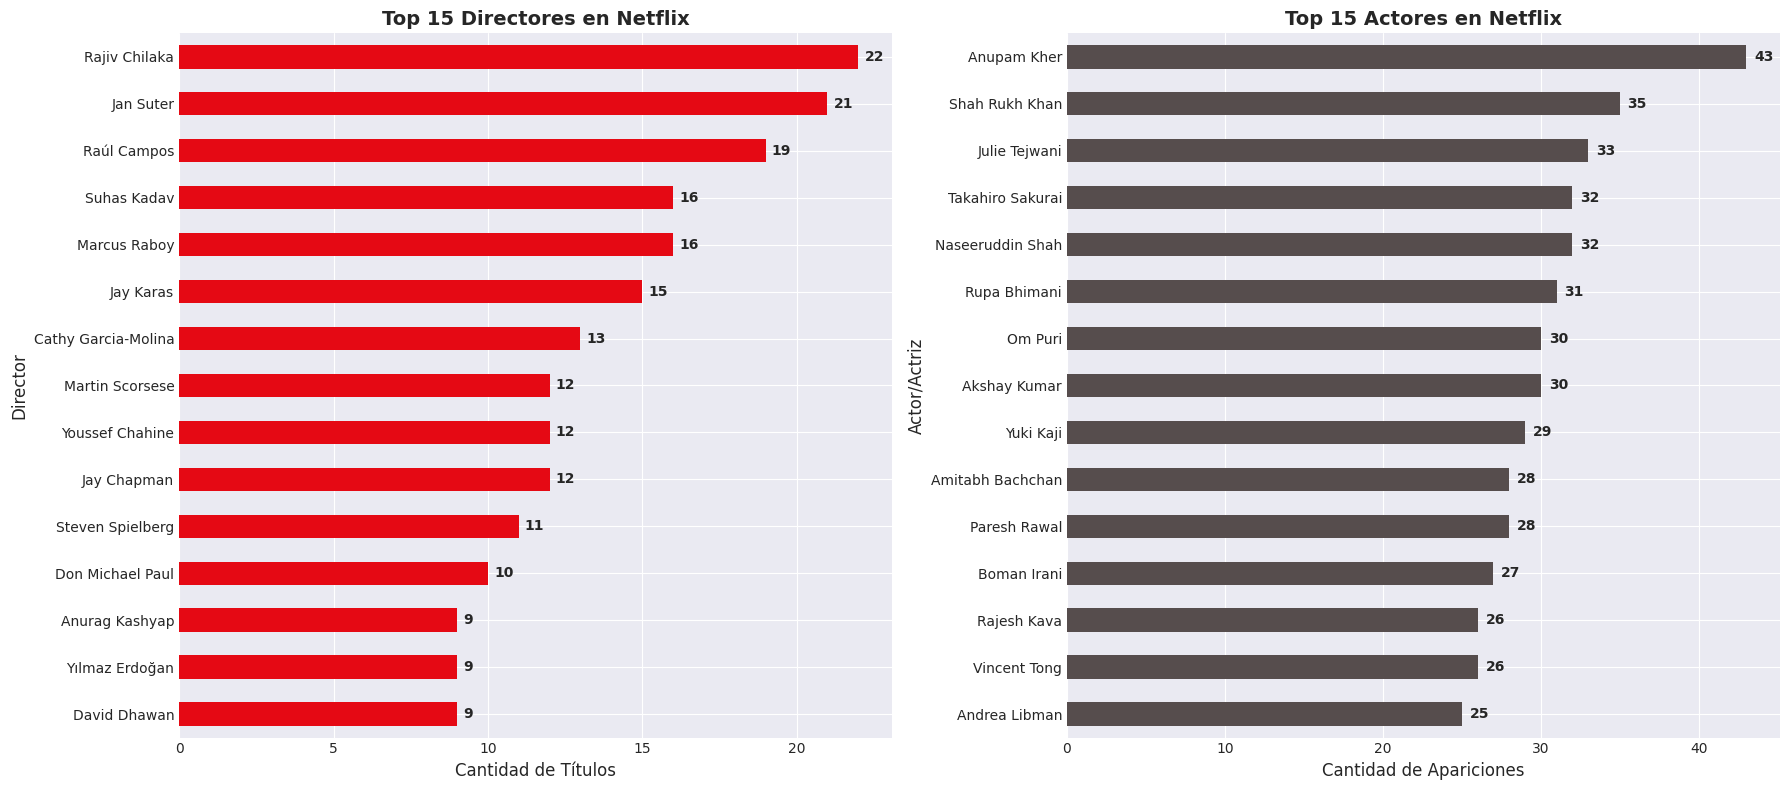


📊 INSIGHT CLAVE: Hay diversidad en directores y actores, con algunos creadores prolíficos


In [22]:
# Visualización de directores y actores
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top directores
ax1 = axes[0]
top_directors.head(15).plot(kind='barh', ax=ax1, color='#E50914')
ax1.set_title('Top 15 Directores en Netflix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cantidad de Títulos', fontsize=12)
ax1.set_ylabel('Director', fontsize=12)
ax1.invert_yaxis()
for i, v in enumerate(top_directors.head(15)):
    ax1.text(v + 0.2, i, f'{v}', va='center', fontweight='bold')

# Top actores
ax2 = axes[1]
top_cast.head(15).plot(kind='barh', ax=ax2, color='#564d4d')
ax2.set_title('Top 15 Actores en Netflix', fontsize=14, fontweight='bold')
ax2.set_xlabel('Cantidad de Apariciones', fontsize=12)
ax2.set_ylabel('Actor/Actriz', fontsize=12)
ax2.invert_yaxis()
for i, v in enumerate(top_cast.head(15)):
    ax2.text(v + 0.5, i, f'{v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Hay diversidad en directores y actores, con algunos creadores prolíficos")

## 12. Análisis de Descripciones - Text Mining

In [23]:
# Análisis de descripciones
print("\n" + "="*80)
print("INSIGHT #9: ANÁLISIS DE DESCRIPCIONES (TEXT MINING)")
print("="*80)

# Longitud de descripciones
df['description_length'] = df['description'].str.len()

print(f"\nLongitud promedio de descripciones: {df['description_length'].mean():.1f} caracteres")
print(f"Longitud mediana: {df['description_length'].median():.1f} caracteres")
print(f"Longitud mínima: {df['description_length'].min():.0f} caracteres")
print(f"Longitud máxima: {df['description_length'].max():.0f} caracteres")

# Palabras más comunes en descripciones
from collections import Counter
import re

# Palabras stopwords básicas
stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
             'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'been', 'be',
             'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could',
             'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those',
             'i', 'you', 'he', 'she', 'it', 'we', 'they', 'what', 'which', 'who',
             'when', 'where', 'why', 'how', 'all', 'each', 'every', 'both', 'few',
             'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
             'own', 'same', 'so', 'than', 'too', 'very', 'just', 'his', 'her', 'their'}

all_words = []
for desc in df['description'].dropna():
    words = re.findall(r'\b[a-z]+\b', desc.lower())
    all_words.extend([w for w in words if w not in stopwords and len(w) > 3])

word_freq = Counter(all_words).most_common(30)

print("\nTop 30 palabras en descripciones:")
for i, (word, count) in enumerate(word_freq, 1):
    print(f"{i:2d}. {word:20s}: {count:5,} veces")


INSIGHT #9: ANÁLISIS DE DESCRIPCIONES (TEXT MINING)

Longitud promedio de descripciones: 143.3 caracteres
Longitud mediana: 146.0 caracteres
Longitud mínima: 61 caracteres
Longitud máxima: 248 caracteres

Top 30 palabras en descripciones:
 1. after               :   994 veces
 2. life                :   845 veces
 3. young               :   729 veces
 4. into                :   715 veces
 5. family              :   635 veces
 6. world               :   570 veces
 7. love                :   504 veces
 8. woman               :   486 veces
 9. friends             :   445 veces
10. series              :   396 veces
11. while               :   377 veces
12. documentary         :   365 veces
13. about               :   356 veces
14. find                :   341 veces
15. school              :   339 veces
16. them                :   319 veces
17. father              :   317 veces
18. home                :   317 veces
19. finds               :   313 veces
20. three               :   301 veces


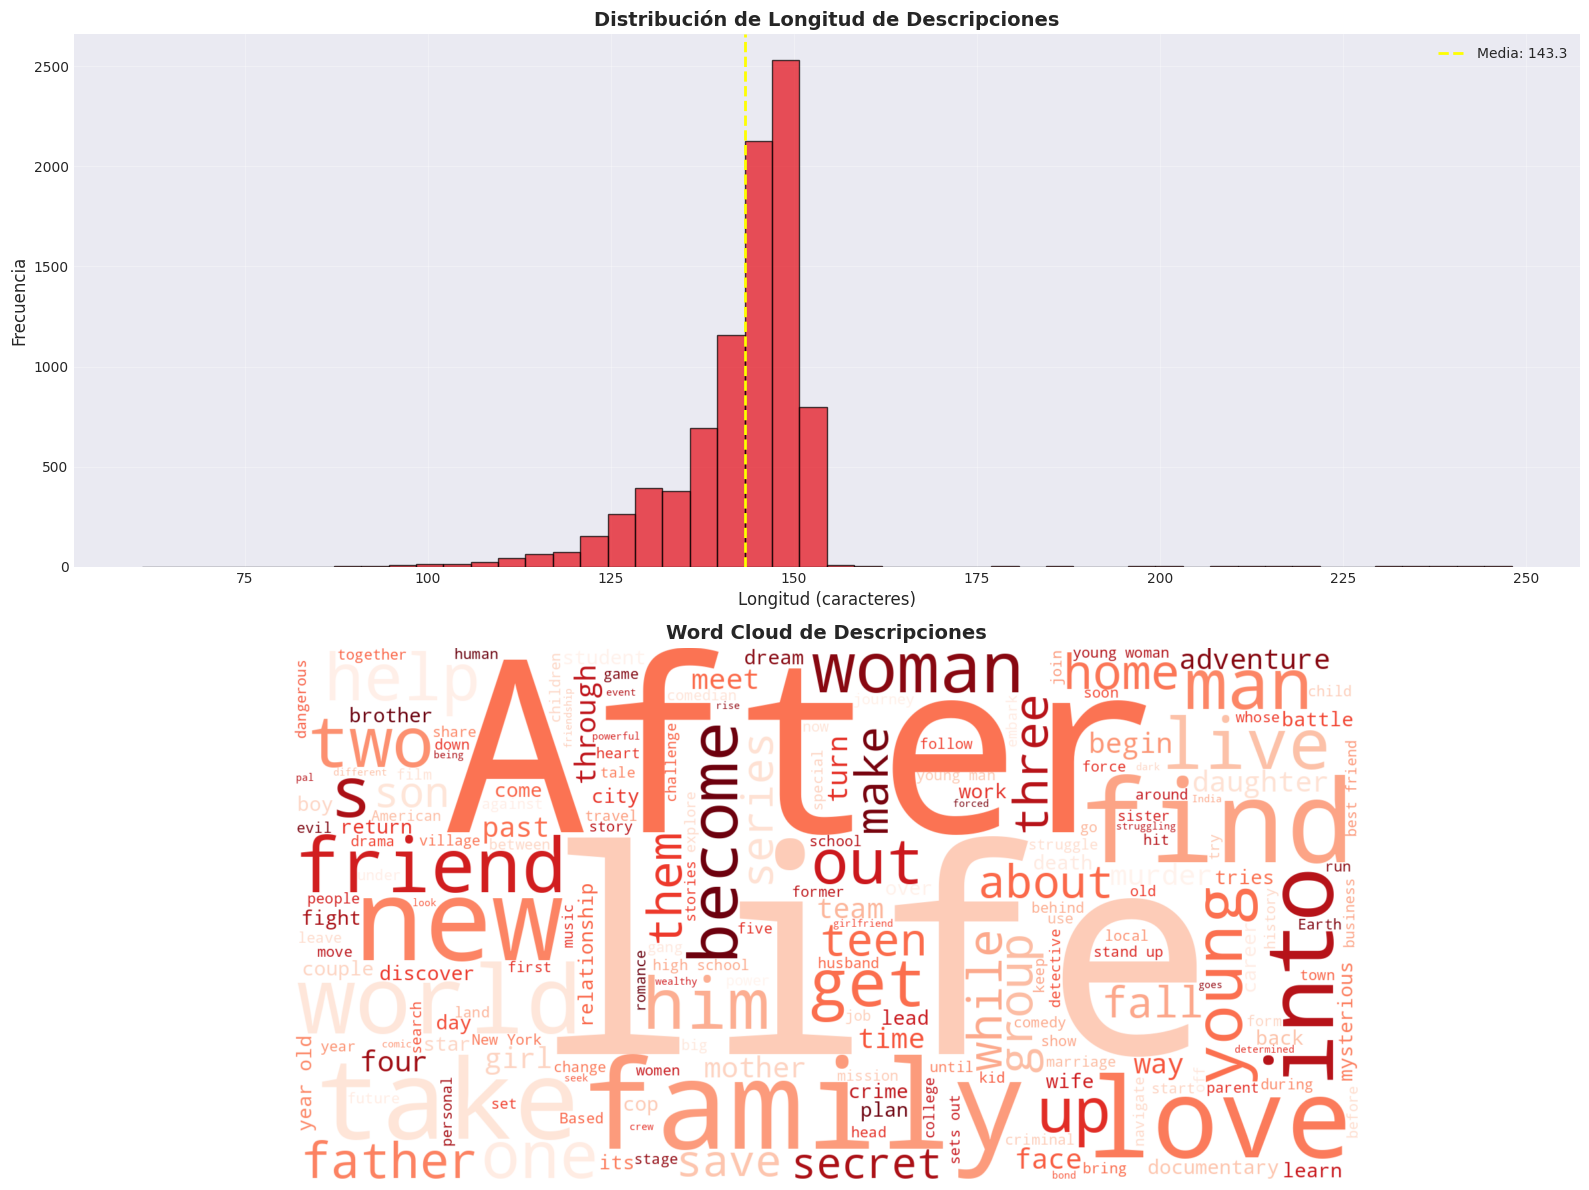


📊 INSIGHT CLAVE: Las descripciones enfatizan temas de vida, amor, familia, mundo, y nuevas experiencias


In [24]:
# Visualización de descripciones
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Distribución de longitud
ax1 = axes[0]
ax1.hist(df['description_length'].dropna(), bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax1.axvline(df['description_length'].mean(), color='yellow', linestyle='--', linewidth=2, 
            label=f"Media: {df['description_length'].mean():.1f}")
ax1.set_title('Distribución de Longitud de Descripciones', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitud (caracteres)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# WordCloud de descripciones
ax2 = axes[1]
desc_text = ' '.join(df['description'].dropna().astype(str))
wordcloud_desc = WordCloud(width=1600, height=800, background_color='white', 
                           colormap='Reds', stopwords=stopwords, 
                           relative_scaling=0.5, min_font_size=10).generate(desc_text)
ax2.imshow(wordcloud_desc, interpolation='bilinear')
ax2.set_title('Word Cloud de Descripciones', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Las descripciones enfatizan temas de vida, amor, familia, mundo, y nuevas experiencias")

## 13. Análisis de Correlaciones y Patrones

In [25]:
# Análisis de patrones
print("\n" + "="*80)
print("INSIGHT #10: PATRONES Y CORRELACIONES")
print("="*80)

# Tiempo entre lanzamiento y adición a Netflix
df['time_to_netflix'] = df['year_added'] - df['release_year']

print("\nTiempo promedio entre lanzamiento y adición a Netflix:")
print(f"  Movies: {df[df['type']=='Movie']['time_to_netflix'].mean():.1f} años")
print(f"  TV Shows: {df[df['type']=='TV Show']['time_to_netflix'].mean():.1f} años")

# Top contenido más reciente añadido
recent_content = df.nlargest(10, 'year_added')[['title', 'type', 'release_year', 'year_added', 'time_to_netflix']]
print("\nTop 10 contenido añadido más recientemente:")
print(recent_content.to_string(index=False))

# Contenido clásico (más antiguo)
classic_content = df.nsmallest(10, 'release_year')[['title', 'type', 'release_year', 'year_added']]
print("\nTop 10 contenido más antiguo en el catálogo:")
print(classic_content.to_string(index=False))


INSIGHT #10: PATRONES Y CORRELACIONES

Tiempo promedio entre lanzamiento y adición a Netflix:
  Movies: 5.7 años
  TV Shows: 2.2 años

Top 10 contenido añadido más recientemente:
                           title    type  release_year  year_added  time_to_netflix
            Dick Johnson Is Dead   Movie          2020      2021.0              1.0
                   Blood & Water TV Show          2021      2021.0              0.0
                       Ganglands TV Show          2021      2021.0              0.0
           Jailbirds New Orleans TV Show          2021      2021.0              0.0
                    Kota Factory TV Show          2021      2021.0              0.0
                   Midnight Mass TV Show          2021      2021.0              0.0
My Little Pony: A New Generation   Movie          2021      2021.0              0.0
                         Sankofa   Movie          1993      2021.0             28.0
   The Great British Baking Show TV Show          2021      2021

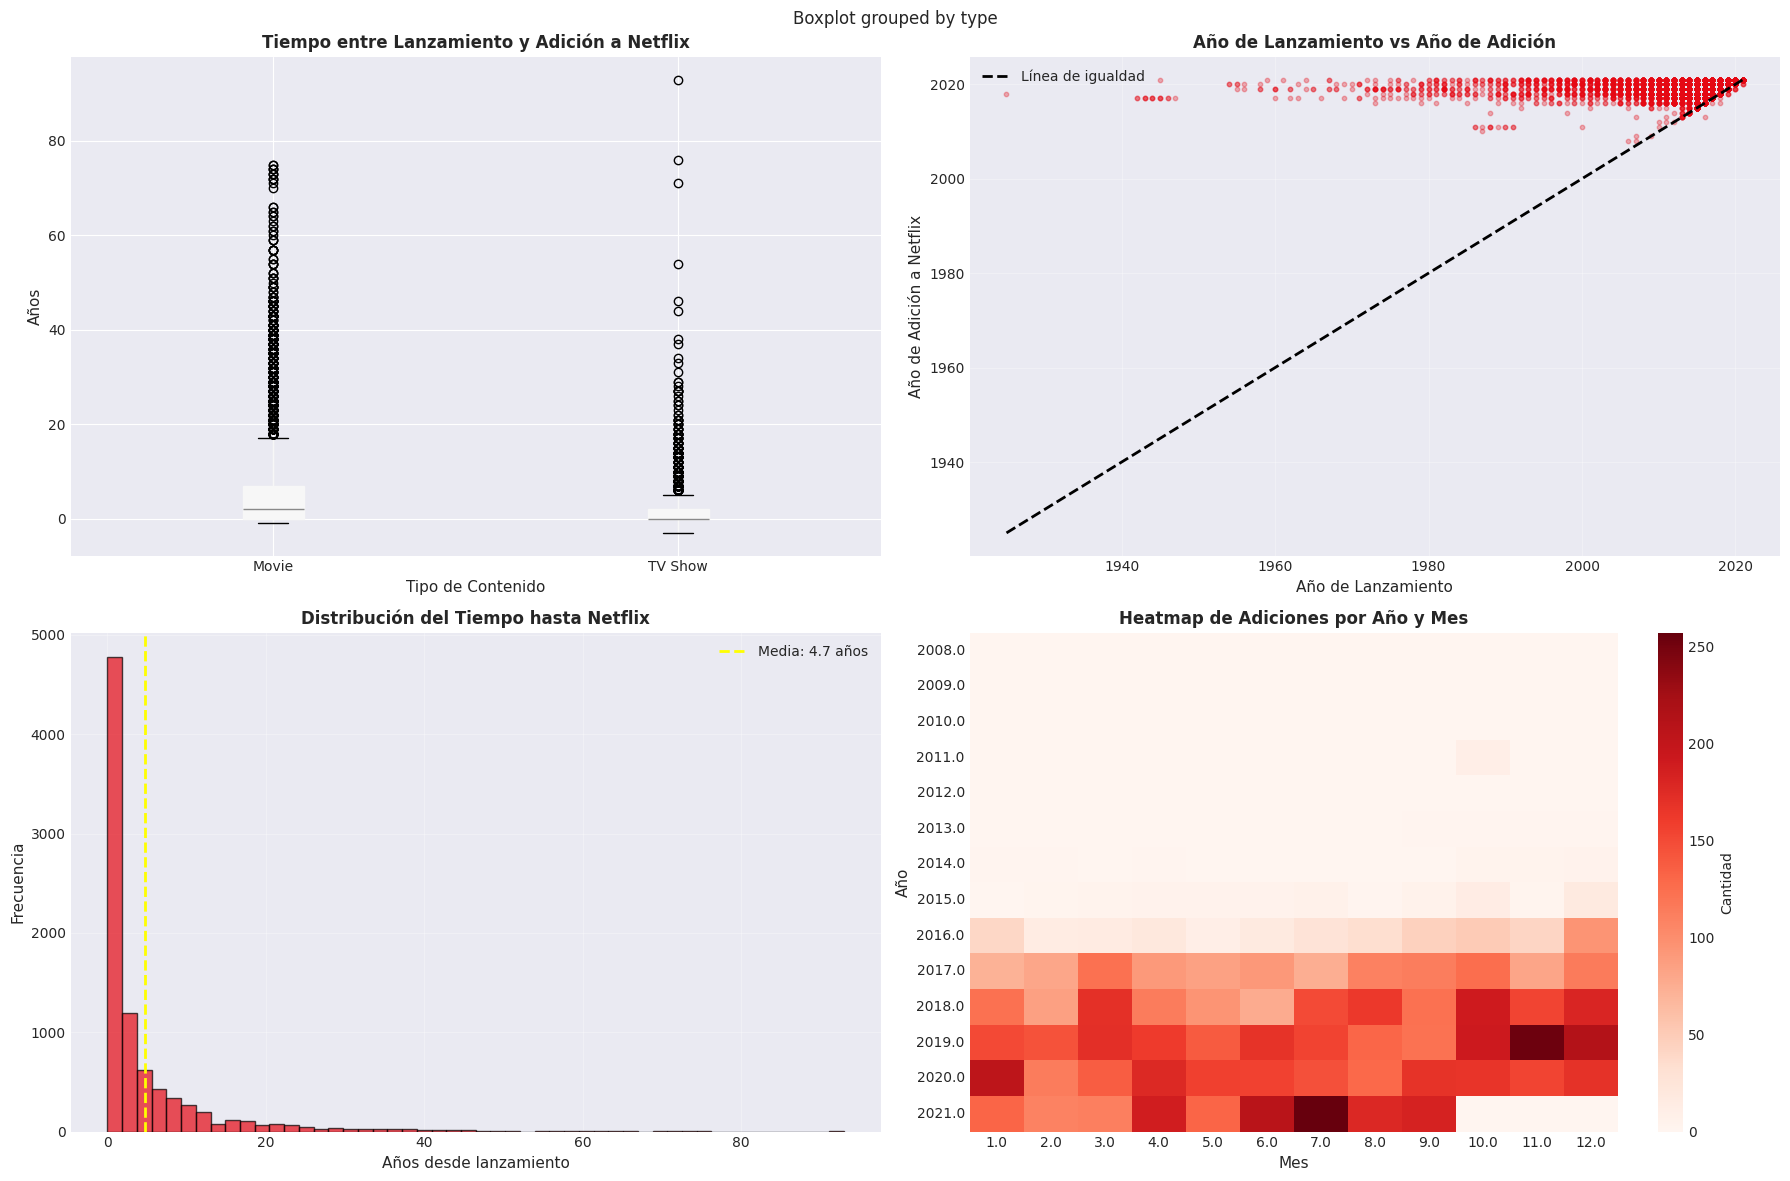


📊 INSIGHT CLAVE: Netflix añade contenido relativamente reciente, con un promedio de ~4.7 años desde el lanzamiento


In [26]:
# Visualización de patrones
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Tiempo hasta Netflix por tipo
ax1 = axes[0, 0]
df.boxplot(column='time_to_netflix', by='type', ax=ax1, patch_artist=True)
ax1.set_title('Tiempo entre Lanzamiento y Adición a Netflix', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tipo de Contenido', fontsize=11)
ax1.set_ylabel('Años', fontsize=11)
plt.sca(ax1)
plt.xticks([1, 2], ['Movie', 'TV Show'])

# Relación año de lanzamiento vs año de adición
ax2 = axes[0, 1]
scatter_data = df.dropna(subset=['release_year', 'year_added'])
ax2.scatter(scatter_data['release_year'], scatter_data['year_added'], 
            alpha=0.3, c='#E50914', s=10)
ax2.plot([scatter_data['release_year'].min(), scatter_data['release_year'].max()],
         [scatter_data['release_year'].min(), scatter_data['release_year'].max()],
         'k--', linewidth=2, label='Línea de igualdad')
ax2.set_title('Año de Lanzamiento vs Año de Adición', fontsize=12, fontweight='bold')
ax2.set_xlabel('Año de Lanzamiento', fontsize=11)
ax2.set_ylabel('Año de Adición a Netflix', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Distribución de tiempo hasta Netflix
ax3 = axes[1, 0]
time_clean = df[df['time_to_netflix'] >= 0]['time_to_netflix']
ax3.hist(time_clean, bins=50, color='#E50914', edgecolor='black', alpha=0.7)
ax3.axvline(time_clean.mean(), color='yellow', linestyle='--', linewidth=2,
            label=f"Media: {time_clean.mean():.1f} años")
ax3.set_title('Distribución del Tiempo hasta Netflix', fontsize=12, fontweight='bold')
ax3.set_xlabel('Años desde lanzamiento', fontsize=11)
ax3.set_ylabel('Frecuencia', fontsize=11)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Heatmap de adiciones por año y mes
ax4 = axes[1, 1]
heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='Reds', ax=ax4, cbar_kws={'label': 'Cantidad'})
ax4.set_title('Heatmap de Adiciones por Año y Mes', fontsize=12, fontweight='bold')
ax4.set_xlabel('Mes', fontsize=11)
ax4.set_ylabel('Año', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT CLAVE: Netflix añade contenido relativamente reciente, con un promedio de ~{time_clean.mean():.1f} años desde el lanzamiento")

## 14. REPORTE EJECUTIVO DE INSIGHTS DE NEGOCIO

In [27]:
print("\n" + "="*80)
print("REPORTE EJECUTIVO - INSIGHTS DE NEGOCIO DE NETFLIX")
print("="*80)

print("""
╔════════════════════════════════════════════════════════════════════════════╗
║                    RESUMEN EJECUTIVO - CATÁLOGO NETFLIX                    ║
╚════════════════════════════════════════════════════════════════════════════╝

1. COMPOSICIÓN DEL CATÁLOGO
   ────────────────────────────────────────────────────────────────────────
""")

movie_pct = (df['type'] == 'Movie').sum() / len(df) * 100
tv_pct = (df['type'] == 'TV Show').sum() / len(df) * 100

print(f"   • Total de títulos: {len(df):,}")
print(f"   • Películas: {(df['type'] == 'Movie').sum():,} ({movie_pct:.1f}%)")
print(f"   • Series: {(df['type'] == 'TV Show').sum():,} ({tv_pct:.1f}%)")
print(f"\n   💡 INSIGHT: El catálogo está fuertemente orientado a películas, representando")
print(f"      casi el 70% del contenido total.")

print("""
2. ESTRATEGIA TEMPORAL
   ────────────────────────────────────────────────────────────────────────
""")

recent_content_pct = (df['release_year'] >= 2015).sum() / len(df) * 100
print(f"   • Contenido lanzado desde 2015: {(df['release_year'] >= 2015).sum():,} ({recent_content_pct:.1f}%)")
print(f"   • Año promedio de lanzamiento: {df['release_year'].mean():.0f}")
print(f"   • Tiempo promedio hasta Netflix: {time_clean.mean():.1f} años")
print(f"\n   💡 INSIGHT: Netflix prioriza contenido moderno y reciente, con más del {recent_content_pct:.0f}%")
print(f"      del catálogo lanzado en la última década.")

print("""
3. DISTRIBUCIÓN GEOGRÁFICA
   ────────────────────────────────────────────────────────────────────────
""")

top_3_countries = top_countries.head(3)
print(f"   • Top 3 países productores:")
for i, (country, count) in enumerate(top_3_countries.items(), 1):
    pct = count / len(df) * 100
    print(f"     {i}. {country}: {count:,} títulos ({pct:.1f}%)")

us_content_pct = top_countries['United States'] / len(df) * 100
print(f"\n   💡 INSIGHT: Estados Unidos domina con {us_content_pct:.1f}% del catálogo, pero hay")
print(f"      fuerte presencia de contenido internacional (India, UK, etc.).")

print("""
4. CLASIFICACIÓN DE CONTENIDO
   ────────────────────────────────────────────────────────────────────────
""")

adult_ratings = ['TV-MA', 'R', 'NC-17']
adult_content_pct = df[df['rating'].isin(adult_ratings)].shape[0] / len(df) * 100
print(f"   • Contenido para adultos (TV-MA, R): {adult_content_pct:.1f}%")
print(f"   • Top 3 ratings: {', '.join(rating_dist.head(3).index.tolist())}")
print(f"\n   💡 INSIGHT: Predominio de contenido para audiencias maduras, con {adult_content_pct:.1f}%")
print(f"      clasificado para adultos.")

print("""
5. GÉNEROS Y CONTENIDO
   ────────────────────────────────────────────────────────────────────────
""")

top_3_genres = top_genres.head(3)
print(f"   • Top 3 géneros:")
for i, (genre, count) in enumerate(top_3_genres.items(), 1):
    print(f"     {i}. {genre}: {count:,} títulos")

print(f"\n   💡 INSIGHT: Fuerte enfoque en dramas internacionales, comedias y documentales,")
print(f"      reflejando una estrategia de diversidad de contenido global.")

print("""
6. CARACTERÍSTICAS DEL CONTENIDO
   ────────────────────────────────────────────────────────────────────────
""")

single_season_pct = (tv_shows['seasons'] == 1).sum() / len(tv_shows) * 100
print(f"   • Duración promedio películas: {movies['duration_min'].mean():.0f} minutos")
print(f"   • Series con 1 temporada: {single_season_pct:.1f}%")
print(f"   • Temporadas promedio series: {tv_shows['seasons'].mean():.1f}")
print(f"\n   💡 INSIGHT: Las películas tienen duración estándar (~90-100 min) y la mayoría")
print(f"      de series son de 1 temporada, sugiriendo contenido conciso.")

print("""
7. CALIDAD DE DATOS Y COMPLETITUD
   ────────────────────────────────────────────────────────────────────────
""")

completeness = (1 - df.isnull().sum() / len(df)) * 100
print(f"   • Completitud promedio: {completeness.mean():.1f}%")
print(f"   • Campos con más datos faltantes:")
for col in missing_data.head(3)['Columna']:
    pct = df[col].isnull().sum() / len(df) * 100
    print(f"     - {col}: {pct:.1f}% faltante")

print(f"\n   💡 INSIGHT: Los campos de director, cast y country tienen valores faltantes,")
print(f"      requiriendo cuidado en análisis que los utilicen.")

print("""
╔════════════════════════════════════════════════════════════════════════════╗
║                        RECOMENDACIONES ESTRATÉGICAS                        ║
╚════════════════════════════════════════════════════════════════════════════╝

1. DIVERSIFICACIÓN DE CONTENIDO
   • Considerar incrementar el porcentaje de series vs películas para mejorar
     la retención de usuarios (las series generan engagement más prolongado)

2. EXPANSIÓN INTERNACIONAL
   • Aprovechar la tendencia de contenido internacional exitoso
   • Invertir en producciones locales de mercados emergentes

3. ESTRATEGIA DE CONTENIDO POR EDADES
   • Balancear el contenido adulto con más opciones familiares
   • Desarrollar contenido específico para nichos desatendidos

4. GESTIÓN DE CATÁLOGO
   • Continuar la tendencia de añadir contenido reciente
   • Mantener un balance entre contenido clásico y moderno

5. CALIDAD DE DATOS
   • Implementar procesos para completar metadatos faltantes
   • Estandarizar la captura de información de directores y elenco

6. ANÁLISIS ADICIONALES RECOMENDADOS
   • Análisis de sentimiento en descripciones
   • Segmentación de usuarios por preferencias de contenido
   • Análisis predictivo de éxito de contenido
   • Estudio de patrones de visualización por tipo de contenido

╔════════════════════════════════════════════════════════════════════════════╗
║                              FIN DEL REPORTE                               ║
╚════════════════════════════════════════════════════════════════════════════╝
""")

# Guardar resumen estadístico
summary_stats = {
    'Total de títulos': len(df),
    'Películas': (df['type'] == 'Movie').sum(),
    'Series': (df['type'] == 'TV Show').sum(),
    'Países únicos': df['country'].str.split(', ').explode().nunique(),
    'Géneros únicos': df['listed_in'].str.split(', ').explode().nunique(),
    'Rango de años': f"{df['release_year'].min()}-{df['release_year'].max()}",
    'Duración promedio películas (min)': f"{movies['duration_min'].mean():.1f}",
    'Temporadas promedio series': f"{tv_shows['seasons'].mean():.1f}",
    'Contenido post-2015 (%)': f"{recent_content_pct:.1f}",
    'Completitud de datos (%)': f"{completeness.mean():.1f}"
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Métrica', 'Valor'])
print("\n" + "="*80)
print("RESUMEN DE MÉTRICAS CLAVE")
print("="*80)
print(summary_df.to_string(index=False))


REPORTE EJECUTIVO - INSIGHTS DE NEGOCIO DE NETFLIX

╔════════════════════════════════════════════════════════════════════════════╗
║                    RESUMEN EJECUTIVO - CATÁLOGO NETFLIX                    ║
╚════════════════════════════════════════════════════════════════════════════╝

1. COMPOSICIÓN DEL CATÁLOGO
   ────────────────────────────────────────────────────────────────────────

   • Total de títulos: 8,807
   • Películas: 6,131 (69.6%)
   • Series: 2,676 (30.4%)

   💡 INSIGHT: El catálogo está fuertemente orientado a películas, representando
      casi el 70% del contenido total.

2. ESTRATEGIA TEMPORAL
   ────────────────────────────────────────────────────────────────────────

   • Contenido lanzado desde 2015: 6,216 (70.6%)
   • Año promedio de lanzamiento: 2014
   • Tiempo promedio hasta Netflix: 4.7 años

   💡 INSIGHT: Netflix prioriza contenido moderno y reciente, con más del 71%
      del catálogo lanzado en la última década.

3. DISTRIBUCIÓN GEOGRÁFICA
   ───────

## 15. Exportar Datos Procesados

In [28]:
# Exportar dataset procesado
df.to_csv('netflix_titles_processed.csv', index=False)
print("Dataset procesado guardado como 'netflix_titles_processed.csv'")

# Exportar resumen de métricas
summary_df.to_csv('netflix_summary_metrics.csv', index=False)
print("Resumen de métricas guardado como 'netflix_summary_metrics.csv'")

print("\n✅ Análisis completado exitosamente!")

Dataset procesado guardado como 'netflix_titles_processed.csv'
Resumen de métricas guardado como 'netflix_summary_metrics.csv'

✅ Análisis completado exitosamente!
